# Interactive Visualization with Plotly

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#We-load-data" data-toc-modified-id="We-load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>We load data</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Clustered-Bar-Chart" data-toc-modified-id="Clustered-Bar-Chart-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustered Bar Chart</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Distplot" data-toc-modified-id="Distplot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distplot</a></span></li><li><span><a href="#ScatterPlot" data-toc-modified-id="ScatterPlot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ScatterPlot</a></span></li><li><span><a href="#LineChart" data-toc-modified-id="LineChart-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LineChart</a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Boxplot</a></span></li></ul></div>

In [5]:
# images not rendering on github?: copy the URL to this notebook and post it into https://nbviewer.jupyter.org/

## Importing libraries

First things first: installation --> [documentation here](https://plotly.com/python/getting-started/)

In [85]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!pip install scipy
!pip install --upgrade nbformat

⚠️ Potential error. `pip install --upgrade nbformat`?

## We load data

In [11]:
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
titanic= sns.load_dataset("titanic")

In [13]:
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,Male
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female


In [14]:
df = px.data.gapminder().query("country == 'Canada'") #How to download data from plotly, taken from the documentation

In [15]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


## Bar Charts
Show the counts of the observations in each categorical cell using bars.

In [16]:
fig = px.bar(df, x="year", y="pop")
fig.show()

In [17]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [20]:
penguins.species.value_counts().values

array([152, 124,  68])

In [23]:
fig = px.bar(penguins, x="species")

In [24]:
fig.show()

## Clustered Bar Chart


In [28]:
agrupado = penguins.groupby(["species"])["sex"].value_counts().unstack()
agrupado

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [29]:
agrupado.Female.values

array([73, 34, 58])

In [30]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male


In [31]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [32]:
animals= penguins.species.unique() # This is a list with the names
fig = go.Figure(data=[
    go.Bar(name="Female", x=animals, y=agrupado.Female),
    go.Bar(name="Male", x=animals, y=agrupado.Male)
])

fig.show()

When multiple rows share the same x value (in this case Female or Male), the rectangles are stacked by default.

## Histograms

https://plotly.com/python/histograms/

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
fig = px.histogram(tips, x="total_bill", nbins=20)
fig.update_layout(bargap=0.001) #nbins=20
fig.show()

In [ ]:
propinas = tips.groupby("day", as_index=False)["total_bill"].sum()
fig = px.bar(propinas, x = "day", y="total_bill")
fig.show()

/var/folders/37/xdj49ptx3wn_fkmn66tjq0ch0000gt/T/ipykernel_1722/390965145.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [53]:
fig = px.histogram(titanic, x="age")
fig.add_vline(titanic.age.median(), line_width=3, line_dash="dash", line_color="green")
fig.add_vline(titanic.age.mean(), line_width=3, line_dash="dash", line_color="red")
fig.add_hline(18, line_width=3, line_dash="dash", line_color="red")
fig.show()

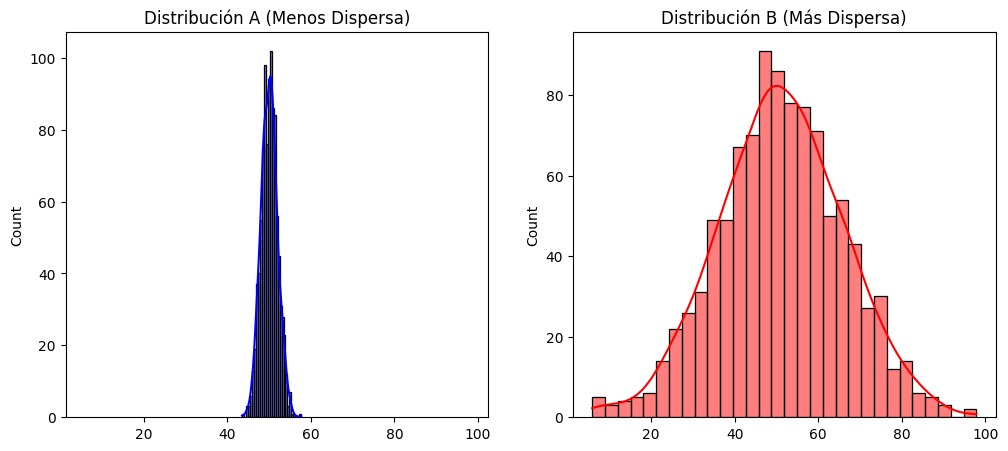

In [ ]:

np.random.seed(42)

data_A = np.random.normal(loc=50, scale=2, size=1000)  # Media = 50, Desviación estándar = 2
data_B = np.random.normal(loc=50, scale=15, size=1000)  # Media = 50, Desviación estándar = 15y 
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.histplot(data_A, bins=30, kde=True, ax=axs[0], color="blue")
axs[0].set_title("Distribución A (Menos Dispersa)")
sns.histplot(data_B, bins=30, kde=True, ax=axs[1], color="red")
axs[1].set_title("Distribución B (Más Dispersa)")
plt.show()

## Distplot

In [54]:
tit = titanic.copy()
tit.dropna(inplace=True)

In [55]:
import plotly.figure_factory as ff
hist_data = [tit.age]
labels = ["Edad"]

In [56]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [57]:
penguins.dropna(inplace=True)

In [58]:
fig = ff.create_distplot(hist_data, labels)
fig.show()

In [59]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [60]:
hist_data = [penguins.bill_length_mm, penguins.bill_depth_mm]
group_labels = ["bill_length_mm","bill_depth_mm"] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

## ScatterPlot

In [90]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [93]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female


In [91]:
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g")
fig.show()

In [92]:
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g", color="bill_length_mm")
fig.show()

In [94]:
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g", color="sex")
fig.show()

In [64]:
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g", color="species")
fig.show()

In [95]:
fig = px.scatter(penguins, x="body_mass_g", y="flipper_length_mm", color="species", size ="bill_depth_mm")
fig.show()

In [96]:
fig = px.scatter_matrix( penguins, dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g', "species"],
                        width=1000, height=800
) 
fig.show()

In [97]:
fig = px.scatter_matrix( penguins, dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], 
                        color="species",
                        width=1000, height=800) 
fig.show()

In [68]:
fig = px.scatter_matrix(penguins,
                dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],
                color="species"
                       )
fig.update_traces(diagonal_visible=False)
fig.show()

In [69]:
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,Female


In [70]:
# Define indices corresponding to species categories, using pandas label encoding
index_vals = penguins['species'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='bill length',
                                 values=penguins['bill_length_mm']),
                            dict(label='bill depth',
                                 values=penguins['bill_depth_mm']),
                            dict(label='flipper length',
                                 values=penguins['flipper_length_mm']),
                            dict(label='body mass',
                                 values=penguins['body_mass_g'])],
                text=penguins['species'],
                showupperhalf=False,
                marker=dict(color=index_vals,
                            showscale=True,
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Penguins',
    dragmode='select',
    width=600,
    height=600,
    hovermode='closest',
)

fig.show()

## LineChart

In [71]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [72]:
feb = flights[flights.month == "Feb"]

In [73]:
fig = px.line(feb, x="year", y="passengers")
fig.show()

In [74]:
fig = px.line(flights, x="year", y="passengers", color="month")
fig.show()

## Boxplot

In [75]:
fig = px.box(titanic, x="age")
fig.show()

In [76]:
fig = px.box(titanic, x="pclass", y="age")
fig.show()

In [77]:
fig = px.box(titanic, x="pclass", y="age", points="all") #Points adds the points to the left of each box
fig.show()

In [78]:
fig = px.box(titanic, x="pclass", y="age", color="survived", points="all", width=1100, height=600) #Points adds the dots to the left
fig.show()

We change the colors by putting the value of the column in the key

In [79]:
fig = px.box(titanic, x="pclass", y="age", color="survived", color_discrete_map={1: '#19D3F3', 0: 'red'}) 
fig.show()

# Sliders

In [80]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year",
                 size="pop",
           color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()